In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets list

ref                                                           title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset  Global Earthquake-Tsunami Risk Assessment Dataset       16151  2025-10-01 16:35:53.273000           6161        239  1.0              
jaderz/hospital-beds-management                               Hospital Beds Management                                47583  2025-10-03 09:21:58.590000           4922        139  1.0              
ahmadrazakashif/bmw-worldwide-sales-records-20102024          BMW Worldwide Sales Records (2010–2024)                853348  2025-09-20 14:39:45.280000          11310        245  1.0              
grandmaster07/s

In [6]:
!kaggle datasets download muratkokludataset/rice-image-dataset

Dataset URL: https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset
License(s): CC0-1.0
 64% 141M/219M [00:00<00:00, 1.47GB/s]
100% 219M/219M [00:00<00:00, 950MB/s] 


In [7]:
!unzip -q rice-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (551).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5510).jpg  
  inflating: Rice_Image_Dataset/Karacadag/K

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Shape :  (512, 512, 3)


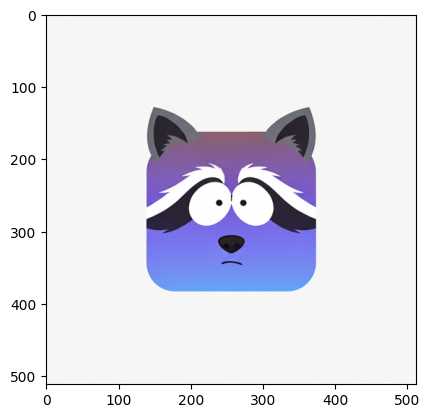

In [9]:
dataset_path = "/content/Rice_Image_Dataset/Arborio/"
plt.imshow(cv2.imread("/content/coonstagram.png"))
print("Shape : ", cv2.imread("/content/coonstagram.png").shape)

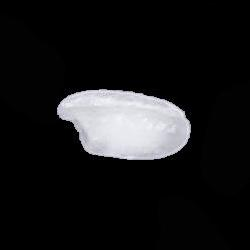

In [10]:
import PIL
PIL.Image.open(dataset_path + "Arborio (1).jpg")

In [11]:
import tensorflow as tf
from keras.utils import image_dataset_from_directory

# Arg : interpolation

String, the interpolation method used when resizing images. Defaults to "bilinear".

Supports "bilinear", "nearest", "bicubic", "area", "lanczos3", "lanczos5", "gaussian", "mitchellcubic".

"nearest" / NEAREST_NEIGHBOR: Uses the value of the nearest pixel. Fastest, but can result in blocky artifacts.

"bilinear" / BILINEAR: Uses linear interpolation of the 4 nearest pixels. Smoother than nearest-neighbor.

"bicubic" / BICUBIC: Uses cubic interpolation of the 16 nearest pixels. Generally provides better visual quality than bilinear, but is computationally more intensive.

"lanczos3" / LANCZOS3 & "lanczos5" / LANCZOS5: Advanced interpolation methods often providing high-quality results, especially for downsampling.

In [12]:
import os
image_size = (250, 250)
batch_size = 32

# List the contents of the unzipped directory to verify the path
print("Contents of the unzipped directory:")
!ls /content/Rice_Image_Dataset/

train_ds = image_dataset_from_directory(
    directory = "/content/Rice_Image_Dataset/", # Corrected directory path
    labels = "inferred",
    label_mode = "categorical",
    validation_split = 0.2,
    subset = "training",
    shuffle = True,
    seed = 42,
    image_size = image_size, # size to which the image must be resized. Default is 256
    batch_size = batch_size,
    interpolation ="bilinear",
    color_mode = "grayscale",
    verbose = True
)

validation_ds = image_dataset_from_directory(
    directory = "/content/Rice_Image_Dataset/", # Corrected directory path
    labels = "inferred",
    label_mode = "categorical",
    validation_split = 0.2,
    subset = "validation",
    shuffle = True,
    seed = 42,
    image_size = image_size, # size to which the image must be resized. Default is 256
    batch_size = batch_size,
    interpolation ="bilinear",
    color_mode = "grayscale", # default is rgb
    verbose = True
)

print("Training classnames : ",train_ds.class_names," \n Validation classnames : ",validation_ds.class_names )

Contents of the unzipped directory:
Arborio  Basmati  Ipsala  Jasmine  Karacadag  Rice_Citation_Request.txt
Found 75000 files belonging to 5 classes.
Using 60000 files for training.
Found 75000 files belonging to 5 classes.
Using 15000 files for validation.
Training classnames :  ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']  
 Validation classnames :  ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


# Visualize the data

The tf.data.Dataset.take(count) method is used to create a new dataset that includes only the first count elements or first count of batches from the original dataset. This is useful for debugging, prototyping, or limiting the size of a dataset for testing

The train_ds is typically created with a .batch(batch_size) operation somewhere upstream. For example, train_ds.batch(32).
Calling .take(1) on this batched dataset gives you just one single batch.

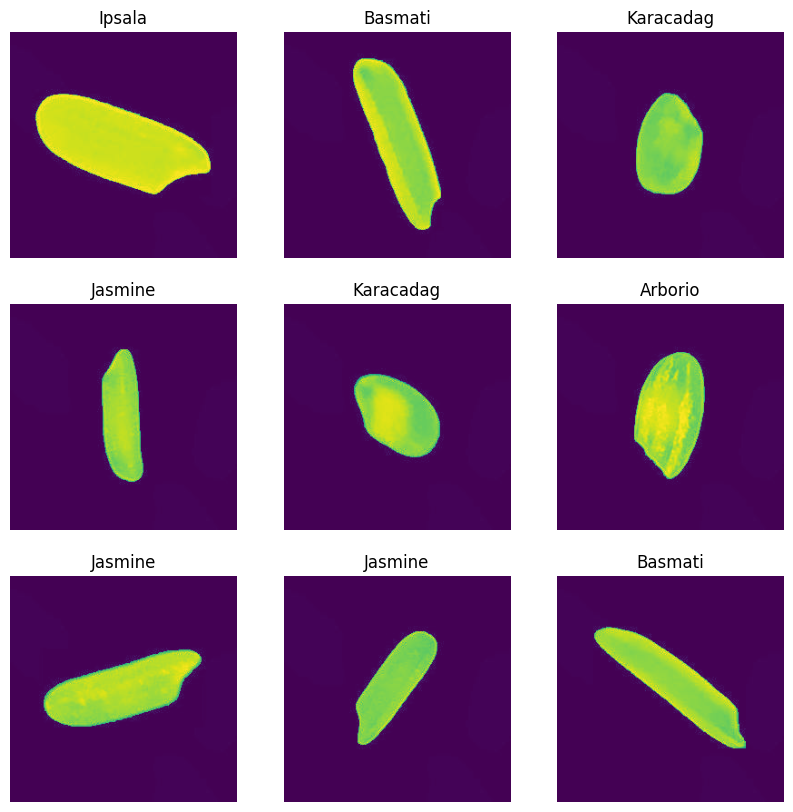

In [13]:
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1) # get the axis for individual plots(images)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[np.argmax(labels[i])]) # while loading labels was converted to OHEvector
    plt.axis("off")


**Configure the dataset for performance**

Let's make sure to use buffered prefetching so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data:

**Dataset.cache** keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

**Dataset.prefetch** overlaps data preprocessing and model execution while training.

In [14]:
# Later


# Dropout Layer :
The core mechanism of a dropout layer is to randomly set a fraction of neurons (and their connections) to zero during each training iteration. This action is temporary and only applied during the training phase.
For ex :  If p=0.5, half the neurons are randomly deactivated in any given forward/backward pass.

It acts regularization & prevents Overfitting. Since the specific set of active neurons changes with every training step, the network learns to be less sensitive to the specific weights of any single neuron.

**In CNN**

In CNNs, the dropout layer is applied similarly, but its placement and application are often slightly nuanced due to the network's structure.

Placement: Dropout is most commonly and effectively applied to the fully connected (dense) layers at the end of the CNN, where the parameter count is highest and overfitting is most likely to occur.

Application to Convolutional Layers: Dropout can also be applied to the output of convolutional layers, But Not Recommended. Because convolutional layers share weights across the feature map (local connectivity and weight sharing), they are generally less prone to overfitting than fully connected layers. When dropout is used on convolutional layers, a lower dropout probability (e.g., $p=0.25$) is often preferred to avoid hindering the training.



# Model Building

In [15]:
from keras.layers import Dense, Conv2D, Rescaling, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential

In [18]:
num_classes = len(train_ds.class_names)

model = Sequential()

model.add(Rescaling(1.0 / 255, input_shape=(250, 250, 1)))
model.add(Conv2D(filters = 16, kernel_size = (3,3), strides = (1,1), activation = "relu"))
model.add(MaxPooling2D(pool_size = (5,5), strides = 2))

model.add(Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1),activation = "relu"))
model.add(MaxPooling2D(pool_size = (5,5), strides = 2))

# model.add(Conv2D(filters = 128, kernel_size = (3,3), strides = (1,1),activation = "relu"))
# model.add(MaxPooling2D(pool_size = (2,2), stride = 2))

model.add( Flatten())

model.add( Dense(units = 64, activation = "relu"))
model.add( Dropout(rate = 0.2))

model.add( Dense(units = 32, activation = "relu"))
model.add( Dropout(rate = 0.2))

model.add( Dense(units = num_classes, activation = "softmax"))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 250, 250, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 248, 248, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 122, 122, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 120, 120, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 58, 58, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 107648)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │     6,889,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,896,581 (26.31 MB)

 Trainable params: 6,896,581 (26.31 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile( optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy", "f1_score"])
model.fit( train_ds, validation_data = validation_ds, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 29ms/step - accuracy: 0.8854 - f1_score: 0.8842 - loss: 0.3104 - val_accuracy: 0.9727 - val_f1_score: 0.9727 - val_loss: 0.0815
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9670 - f1_score: 0.9669 - loss: 0.1066 - val_accuracy: 0.9759 - val_f1_score: 0.9760 - val_loss: 0.0753
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9713 - f1_score: 0.9712 - loss: 0.0902 - val_accuracy: 0.9809 - val_f1_score: 0.9810 - val_loss: 0.0587
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9776 - f1_score: 0.9775 - loss: 0.0731 - val_accuracy: 0.9780 - val_f1_score: 0.9780 - val_loss: 0.0679
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9809 - f1_score: 0.9808 - loss: 0.0623 - val_accuracy: 0.9822 - val_f1_score: 0.9823 - val_loss: 0.0572
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9835 - f1_score: 0.9835 - loss: 0.0507 - val_accuracy: 0.981